Dataset :https://www.kaggle.com/datasets/PromptCloudHQ/us-technology-jobs-on-dicecom

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
job_data=pd.read_csv(r"D:\Recommendation\dice_com-job_us_sample.csv\dice_com-job_us_sample.csv")

In [4]:
job_data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [5]:
job_data.shape

(22000, 12)

In [6]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   site_name                 3490 non-null   object
 10  skills                    21957 non-null  object
 11  uniq_id                   22000 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [9]:
job_data.isnull().sum()

advertiserurl                   0
company                        50
employmenttype_jobstatus      230
jobdescription                  0
jobid                           0
joblocation_address             3
jobtitle                        0
postdate                        0
shift                         357
site_name                   18510
skills                         43
uniq_id                         0
dtype: int64

In [11]:
#job post date with 
print(job_data['postdate'].min())
print(job_data['postdate'].max())

1 day ago
moments ago


In [12]:
job_data['postdate'].describe()

count           22000
unique             93
top       2 weeks ago
freq             3149
Name: postdate, dtype: object

In [16]:
job_data['shift'].value_counts().head(10)

Telecommuting not available|Travel not required         20305
Telecommuting not available|Travel required to 10%.       314
Telecommuting not available|Travel required to 25%.       305
Telecommuting not available|Travel required to 100%.      193
Telecommuting available|Travel not required               146
Telecommuting not available|Travel required to 50%.       141
Telecommuting not available|Travel required to 75%.        97
Telecommuting available|Travel required to 25%.            41
Telecommuting not available|Travel required to 80%.        28
Telecommuting available|Travel required to 50%.            21
Name: shift, dtype: int64

C:\Users\MANEESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shift', ylabel='count'>

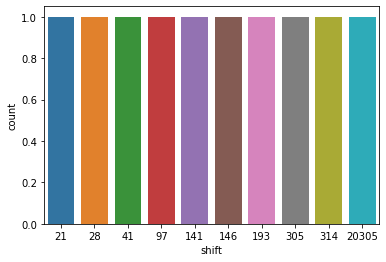

In [18]:
sns.countplot(job_data['shift'].value_counts().head(10))

In [30]:
#Taking top 10 demanding jobs
job_data['jobtitle'].value_counts().head(10)

Java Developer           174
Project Manager          145
Network Engineer         128
Software Engineer        118
Business Analyst         117
.Net Developer            70
DevOps Engineer           60
Systems Engineer          55
Systems Administrator     54
Web Developer             53
Name: jobtitle, dtype: int64

In [26]:
# Renamining employmenttype_jobstatus to job_status
job_data.rename(columns = {'employmenttype_jobstatus':'job_status'}, inplace = True)

Text(0.5, 1.0, ' top 5 jobs ')

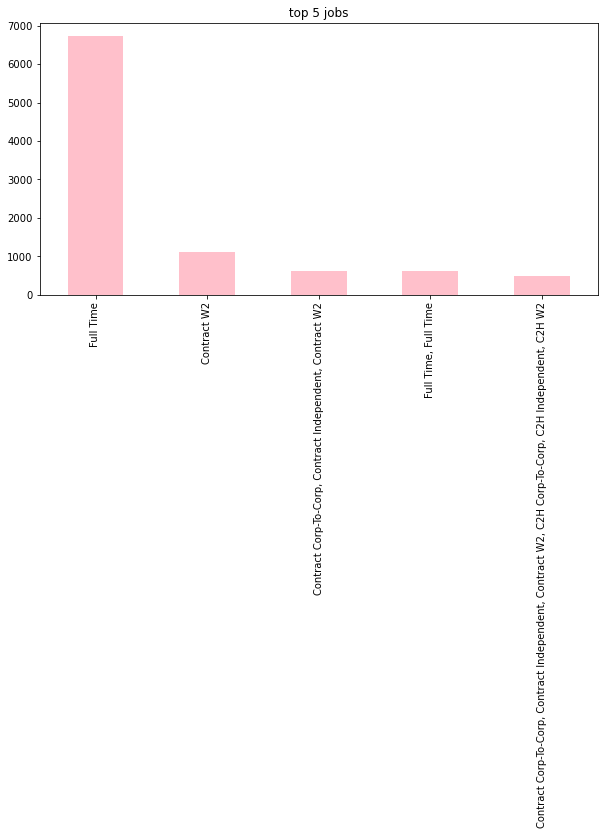

In [28]:
plt.rcParams['figure.figsize']=(10,5)
job_data['job_status'].value_counts().sort_values(ascending=False).head(5).plot.bar(color='pink')
plt.title(' top 5 jobs ')


observation: Most of the people look for a full time jobs

<AxesSubplot:ylabel='shift'>

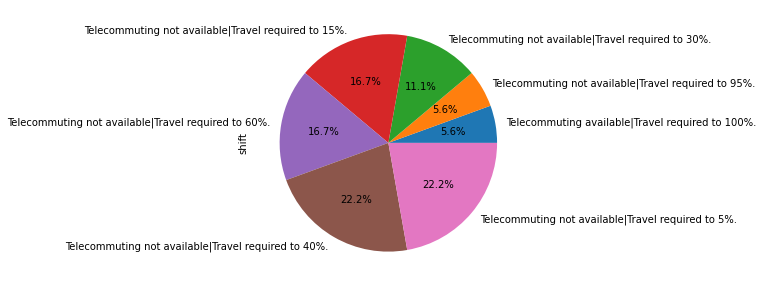

In [31]:
#Taking top 7 shift time 
plt.rcParams['figure.figsize']=(10,5)
job_data['shift'].value_counts().sort_values(ascending=True).head(7).plot.pie(y='shift',autopct="%0.1f%%")